# Import libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import mysql.connector
import sqlalchemy

## Load data

we load data using MSQL connection from database

In [3]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="ozge.12",
  database="starbucks_db"
)

print(mydb)

In [4]:
customers = pd.read_sql('SELECT * FROM customers', mydb)
offers = pd.read_sql('SELECT * FROM offers', mydb)
transcripts = pd.read_sql('SELECT * FROM transcripts', mydb)
members = pd.read_sql('SELECT * FROM members', mydb)

C:\Users\16474\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\16474\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\16474\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\16474\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqli

## EDA on customer profile data

### Gender

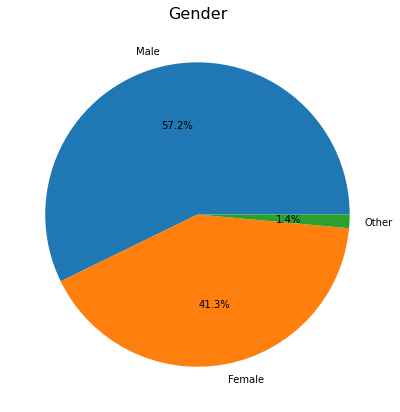

In [15]:
size =  customers['gender'].value_counts()
label = ['Male', 'Female', 'Other']
plt.figure(figsize = (7, 7))
plt.pie(x = size, labels = label, autopct = '%3.1f%%')
plt.title('Gender', fontsize = 16)
plt.show()

There are more males (57.2%) than females (41.3%) customers, and a small share (1.4%) of customers of other genders.

### Age

count    14825.000000
mean        54.393524
std         17.383705
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64


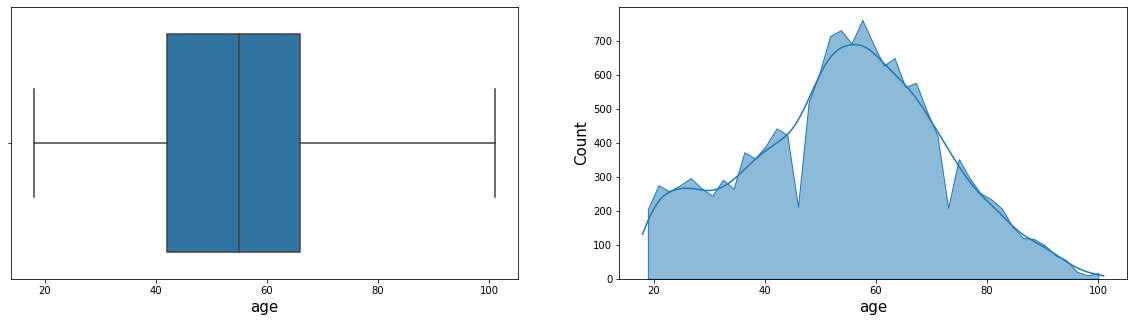

In [21]:
fig, axs = plt.subplots(1,2, figsize = (20,5))

sns.boxplot(data = customers, x = 'age', ax = axs[0])
sns.histplot(data = customers, x = 'age', ax = axs[1], element="poly", kde=True)
axs[0].xaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)

print(customers['age'].describe())

* The age of the customers roughly follows a normal distribution with the mean and the standard deviation equal to 54 and 17.
* The youngest customer is 18 years old and the oldest is 101 years old.


### Divide customers into age groups

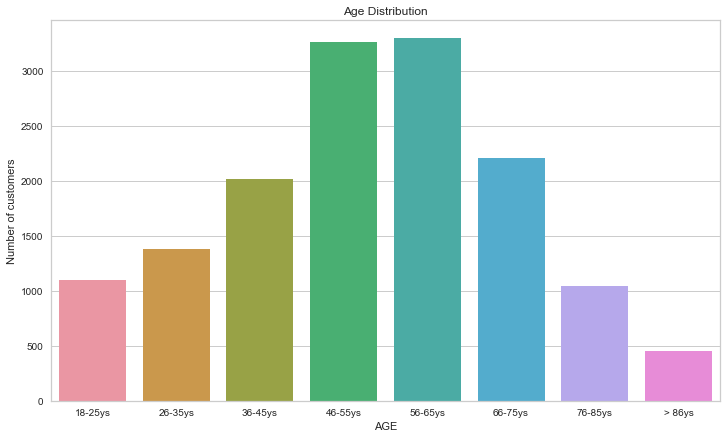

In [23]:
# Create a new column `age_group`
age_group = pd.cut(customers['age'],
      bins = [customers['age'].min(), 26, 36, 46, 56, 66, 76, 86, customers['age'].max()],
      labels = ['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '> 86ys'])
customers['age_group'] = age_group

fig = plt.figure(figsize = (12,7))
ax = sns.countplot(x='age_group',data=customers)
ax.set(xlabel='AGE', ylabel='Number of customers', title = 'Age Distribution')
plt.show()

* The largest age group of customers is 56-65 years olds, second is 46-55 years olds. The third largest age group is 66-75 years olds
* People between 46 - 75 years old account for approximately 60% of customers. They are more bussy than younger people and have more mobility than senior people. Because they have more tine to visit cafes. 


### Income

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64


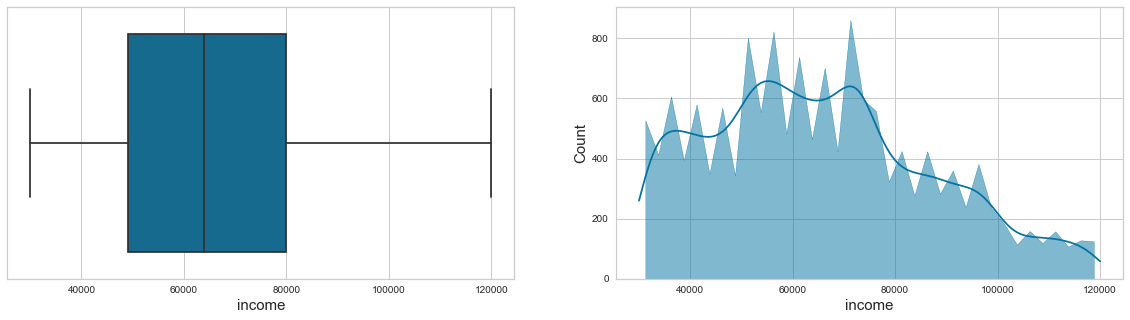

In [26]:
fig, axs = plt.subplots(1,2, figsize = (20,5))
sns.boxplot(data = customers, x = 'income', ax = axs[0])
sns.histplot(data = customers, x = 'income', ax = axs[1], element="poly", kde=True)
axs[0].xaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)

print(customers['income'].describe())

### Divide customers into income groups


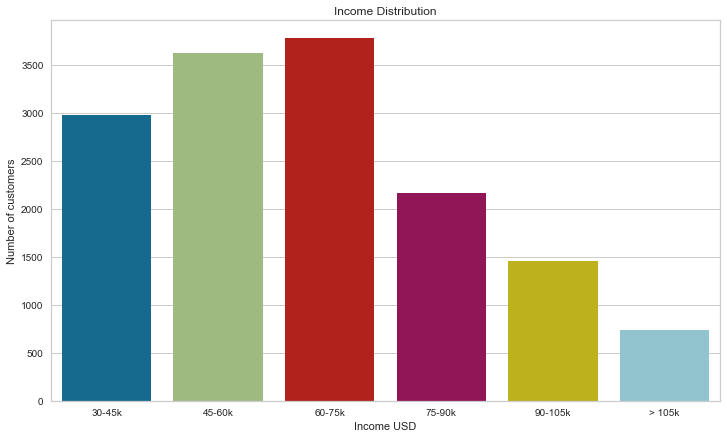

In [27]:
# Create a new column `income_group`
income_group = pd.cut(customers['income'],
      bins = [customers['income'].min(), 45000, 60000, 75000, 90000, 105000, customers['income'].max()],
      labels = ['30-45k', '45-60k', '60-75k', '75-90k', '90-105k', '> 105k'])
customers['income_group'] = income_group

fig = plt.figure(figsize = (12,7))
ax = sns.countplot(x='income_group',data=customers)
ax.set(xlabel='Income USD', ylabel='Number of customers', title = 'Income Distribution')
plt.show()

* Income of customers has a range of 30k to 120k, with an average of 65.4k.
* People with annaul income of 45-75k account for approximately 50% of customers

### Member growth by year, month and weekday

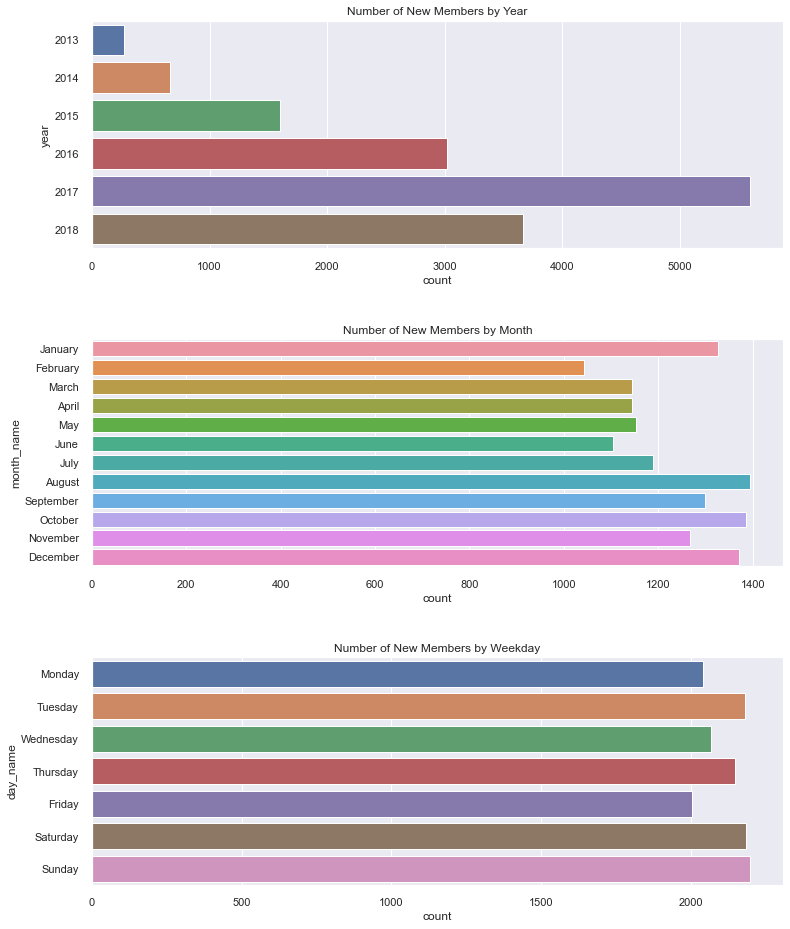

In [55]:
fig, ax = plt.subplots(3, 1, figsize=(12, 15))
ax = ax.flatten()

sns.set()
sns.countplot(data = members, y = 'year', ax=ax[0])
ax[0].set_title("Number of New Members by Year")

sns.countplot(data = members.sort_values('month'), y = 'month_name', ax=ax[1])
ax[1].set_title("Number of New Members by Month")

sns.countplot(data = members.sort_values('day_of_week'), y = 'day_name', ax=ax[2])
ax[2].set_title("Number of New Members by Weekday")
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

* People joined as member increased from 2015 and highest in 2017
* Highest number of people joined in August month, followed by October and December.
* Weekend saw the higher member growth than weekdays. Tuesday had the highest member growth among weekdays.

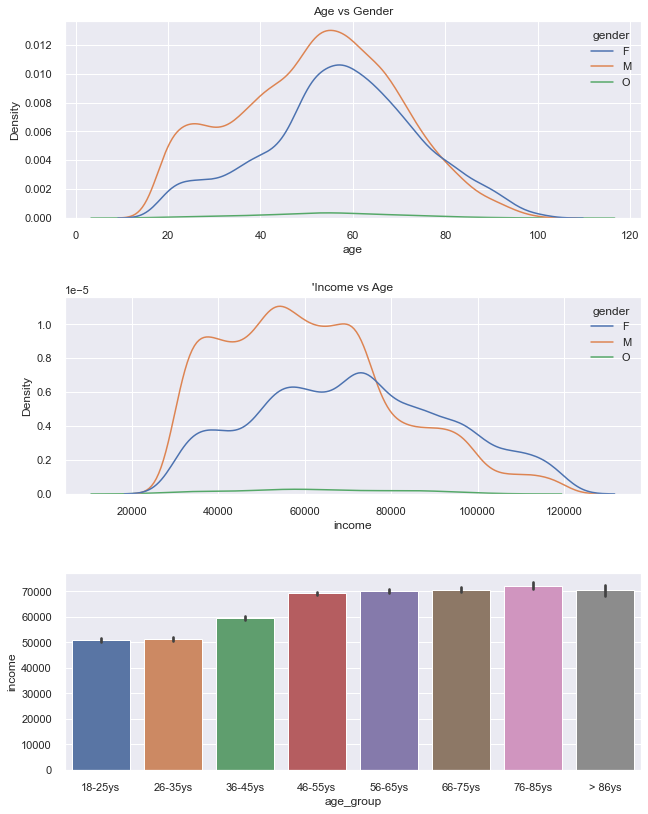

In [65]:
fig, ax = plt.subplots(3, 1, figsize=(10, 13))
ax = ax.flatten()

sns.set()
sns.kdeplot(data = customers, x = 'age', hue = 'gender', ax=ax[0])
ax[0].set_title("Age vs Gender")

sns.kdeplot(data = customers, x = 'income', hue = 'gender', ax=ax[1])
ax[1].set_title("Income vs Gender")

sns.barplot(data = customers, x = 'age_group', y = 'income', ax=ax[2])
ax[1].set_title("'Income vs Age")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

## EDA on offer data

There are 10 offers with 5 variables in the dataset - 3 numerical and 2 categorical

In [93]:
offers['offer_type'].value_counts()

bogo             4
discount         4
informational    2
Name: offer_type, dtype: int64

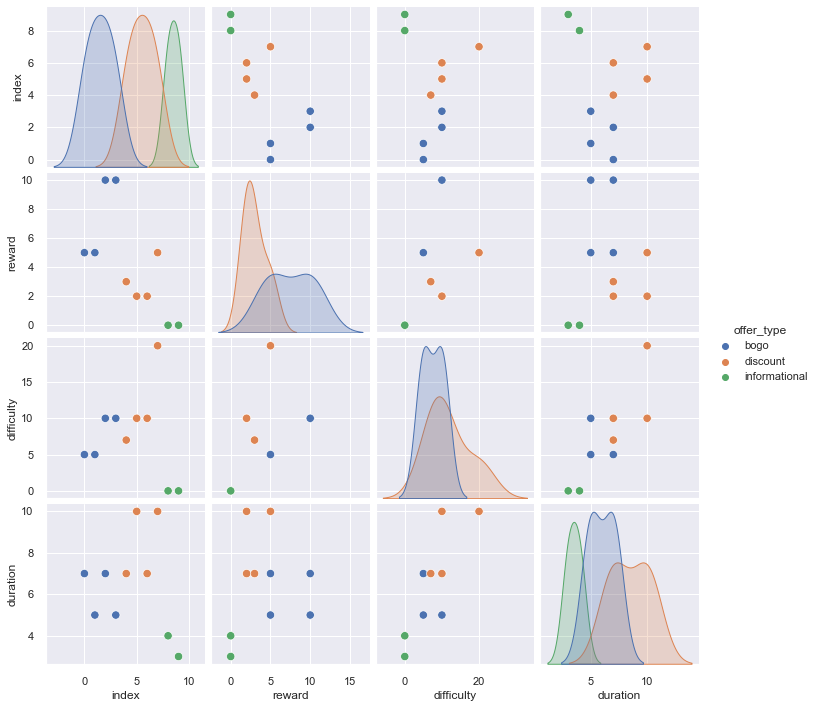

In [82]:
sns.pairplot(offers, hue = 'offer_type', 
             plot_kws = dict(marker="o", s=70),); plt.show()

* There are 4 'bogo' offers (i.e. buy one get one), 4 'discount' offers and 2 'informational' offers.
* Offer difficulty seems to be possitively correlated with offer reward.

* Offer duration seems to negatively correlate with reward and positively correlate with difficulty, when 'informational' offers are exclued 

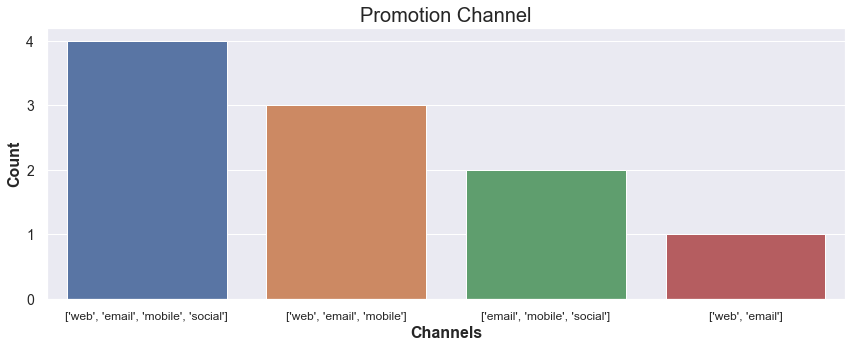

In [97]:
p = offers.value_counts('channels')
plt.figure(figsize = (12,5))
sns.barplot(x = p.index.values, y = p.values)
plt.xticks(rotation = None, fontsize = 12)
plt.yticks(np.arange(5), fontsize = 14)
plt.xlabel('Channels', fontsize = 16, fontweight = 'bold')
plt.ylabel('Count', fontsize = 16, fontweight = 'bold')
plt.title('Promotion Channel', fontsize = 20)
plt.tight_layout()
plt.show()

Offers were sent to customers through combinations of 4 types of promotion channels websites, email, mobile App and social. There are 4 combinations of channels used by the 10 offers.

## EDA on transcripts data

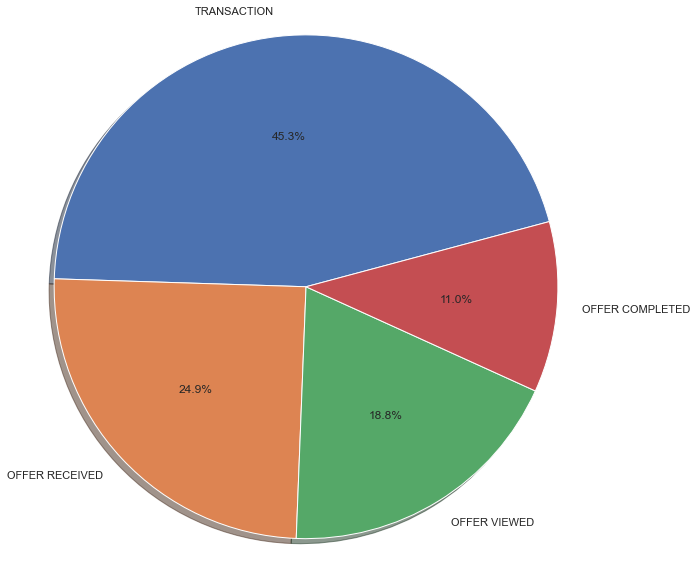

In [112]:
plt.figure(figsize=(10,10))
labels = 'TRANSACTION','OFFER RECEIVED','OFFER VIEWED', 'OFFER COMPLETED'
plt.pie(e, labels=labels, autopct='%1.1f%%', startangle=15, shadow = True)
plt.axis('equal')
plt.show()